In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [25]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Project/Support Vector Regressor/Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [26]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [27]:
X = data.iloc[:, 1:-1].values
Y = data.iloc[:, -1].values

In [28]:
print(X, Y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [29]:
Y = Y.reshape(len(Y), 1)

In [30]:
SC_X = StandardScaler()
X_scaled = SC_X.fit_transform(X)

SC_Y = StandardScaler()
Y_scaled = SC_Y.fit_transform(Y)

In [31]:
print(X_scaled, Y_scaled)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]] [[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [32]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_scaled, Y_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [33]:
Y_pred = SC_Y.inverse_transform(regressor.predict(SC_X.transform([[6.5]])))
print(Y_pred)

[170370.0204065]


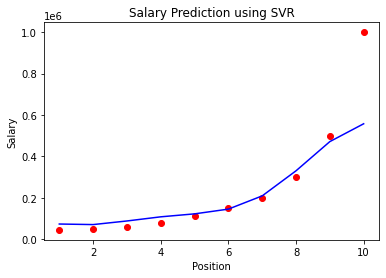

In [34]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, SC_Y.inverse_transform(regressor.predict(X_scaled)), color = 'blue')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Salary Prediction using SVR')
plt.show()

In [35]:
X[len(X)-1][0]

10

In [39]:
X_smooth = np.arange(min(X), max(X), 0.1)
X_smooth = X_smooth.reshape(len(X_smooth),1)
print(X_smooth)

[[1. ]
 [1.1]
 [1.2]
 [1.3]
 [1.4]
 [1.5]
 [1.6]
 [1.7]
 [1.8]
 [1.9]
 [2. ]
 [2.1]
 [2.2]
 [2.3]
 [2.4]
 [2.5]
 [2.6]
 [2.7]
 [2.8]
 [2.9]
 [3. ]
 [3.1]
 [3.2]
 [3.3]
 [3.4]
 [3.5]
 [3.6]
 [3.7]
 [3.8]
 [3.9]
 [4. ]
 [4.1]
 [4.2]
 [4.3]
 [4.4]
 [4.5]
 [4.6]
 [4.7]
 [4.8]
 [4.9]
 [5. ]
 [5.1]
 [5.2]
 [5.3]
 [5.4]
 [5.5]
 [5.6]
 [5.7]
 [5.8]
 [5.9]
 [6. ]
 [6.1]
 [6.2]
 [6.3]
 [6.4]
 [6.5]
 [6.6]
 [6.7]
 [6.8]
 [6.9]
 [7. ]
 [7.1]
 [7.2]
 [7.3]
 [7.4]
 [7.5]
 [7.6]
 [7.7]
 [7.8]
 [7.9]
 [8. ]
 [8.1]
 [8.2]
 [8.3]
 [8.4]
 [8.5]
 [8.6]
 [8.7]
 [8.8]
 [8.9]
 [9. ]
 [9.1]
 [9.2]
 [9.3]
 [9.4]
 [9.5]
 [9.6]
 [9.7]
 [9.8]
 [9.9]]


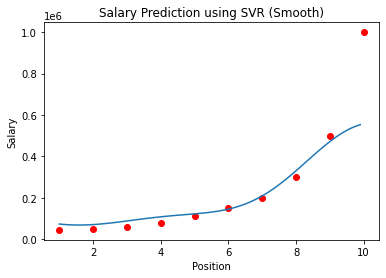

In [40]:
plt.scatter(X, Y, color = 'red')
plt.plot(X_smooth, SC_Y.inverse_transform(regressor.predict(SC_X.transform(X_smooth))))
plt.title('Salary Prediction using SVR (Smooth)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()